In [3]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
shape = df.shape
shape


(768, 9)

In [5]:
diabetic =(df['Outcome']==1).sum()
non_diabetic = (df['Outcome']==0).sum()
print(diabetic, non_diabetic)


268 500


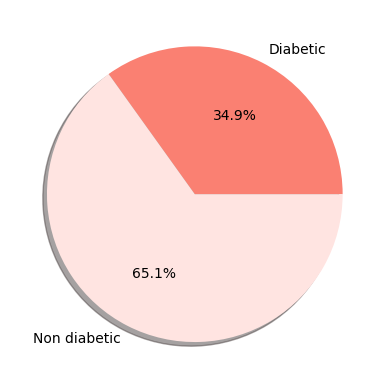

In [6]:
import matplotlib.pyplot as plt
shades=['salmon','mistyrose']
data ={
    'Diabetic' :diabetic,
    'Non diabetic' :non_diabetic
}
plt.pie(data.values(), labels=data.keys(),colors=shades,shadow=True, autopct='%2.1f%%')
plt.show()


In [7]:
pd.crosstab(df['Pregnancies'],df['Outcome'], margins =True).style.background_gradient(cmap='YlOrRd')

Outcome,0,1,All
Pregnancies,,,
0,73,38,111
1,106,29,135
2,84,19,103
3,48,27,75
4,45,23,68
5,36,21,57
6,34,16,50
7,20,25,45
8,16,22,38


In [8]:
#calculating no. of zeros in BloodPressure column

zeros_in_BP = (df['BloodPressure']==0).sum()
non_zeros_in_BP = (df['BloodPressure']>0).sum()
# print(zeros_in_BP,non_zeros_in_BP)
non_zeros_BP_median_1= df[df['BloodPressure']!=0 & (df['Outcome']==1)]['BloodPressure'].median()
non_zeros_BP_median_0 = df[df['BloodPressure']!=0 & (df['Outcome']==0)]['BloodPressure'].median()
print(non_zeros_BP_median_1, non_zeros_BP_median_0)

72.0 72.0


In [9]:
df.loc[(df['BloodPressure']==0) & (df['Outcome']==1), 'BloodPressure']=non_zeros_BP_median_1
df.loc[(df['BloodPressure']==0) & (df['Outcome']==0), 'BloodPressure']=non_zeros_BP_median_0
print((df['BloodPressure']==0).sum())

0


In [10]:
zeros_in_skinThickness = (df['SkinThickness']==0).sum()
non_zero_skinThickness_median_1 = df[(df['SkinThickness']!=0) & (df['Outcome']==1)]['SkinThickness'].median()
non_zero_skinThickness_median_0 = df[(df['SkinThickness']!=0) & (df['Outcome']==0)]['SkinThickness'].median()
print(non_zero_skinThickness_median_1, non_zero_skinThickness_median_0)
df.loc[(df["SkinThickness"]==0) & (df['Outcome']==1), 'SkinThickness']=non_zero_skinThickness_median_1
df.loc[(df["SkinThickness"]==0) & (df['Outcome']==0), 'SkinThickness']=non_zero_skinThickness_median_0

32.0 27.0


In [11]:
print((df['SkinThickness']==0).sum())

0


In [12]:
zeros_in_insulin=(df['Insulin']==0).sum()
non_zero_insulin_median = df[(df['Insulin']!=0)]['Insulin'].median()
non_zero_insulin_median=round(non_zero_insulin_median,0)
non_zero_insulin_median

125.0

In [13]:
df.loc[(df['Insulin']==0) , 'Insulin']=non_zero_insulin_median
print((df['Insulin']==0).sum())
print(df.head())

0
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             66             29      125  26.6   
2            8      183             64             32      125  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [14]:
zeros_in_Glucose = (df["Glucose"]==0).sum()
non_zero_glucose_median_1 = df[(df['Glucose']!=0) & (df['Outcome']==1)]["Glucose"].median()
non_zero_glucose_median_0 = df[(df['Glucose']!=0) & (df['Outcome']==0)]["Glucose"].median()
non_zero_glucose_median_1,non_zero_glucose_median_0

(140.0, 107.0)

In [15]:
df.loc[(df["Glucose"]==0) & (df['Outcome']==1), 'Glucose']=non_zero_glucose_median_1
df.loc[(df["Glucose"]==0) & (df['Outcome']==0), 'Glucose']=non_zero_glucose_median_0
zeros_in_Glucose = (df["Glucose"]==0).sum()
zeros_in_Glucose

0

In [16]:
zeros_in_BMI = (df["BMI"]==0).sum()
print(zeros_in_BMI)
non_zero_BMI_median = df[df['BMI']!=0]["BMI"].median()
non_zero_BMI_median

11


32.3

In [17]:
df.loc[df['BMI'] == 0, 'BMI'] = non_zero_BMI_median
zeros_in_BMI = (df["BMI"]==0).sum()
print(zeros_in_BMI)
print(df.head())

0
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             66             29      125  26.6   
2            8      183             64             32      125  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [18]:
low_glucose =(df['Glucose'] < 70).sum()
normal_glucose=((df['Glucose'] >= 70) & (df['Glucose'] <= 100)).sum()
high_glucose=((df['Glucose'] >100)).sum()
print(low_glucose, normal_glucose, high_glucose)

11 198 559


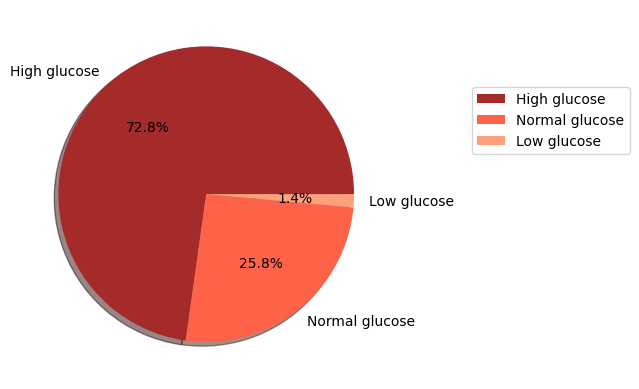

In [19]:
shades = ['brown','tomato','lightsalmon']
data={
    'High glucose' : high_glucose,
    'Normal glucose': normal_glucose,
    'Low glucose': low_glucose
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

In [20]:
dia_low_glucose =((df['Glucose'] < 70) & (df['Outcome']==1)).sum()
dia_normal_glucose=((df['Glucose'] > 70) & (df['Glucose'] <= 100) & (df['Outcome']==1)).sum()
dia_high_glucose=((df['Glucose'] >100) & (df['Outcome']==1)).sum()
print(dia_low_glucose ,dia_normal_glucose,dia_high_glucose)

0 18 250


In [21]:
not_dia_high_glucose=((df['Glucose'] >100) & (df['Outcome']==0)).sum()
print(not_dia_high_glucose)

309


In [22]:
high_insulin=((df['Insulin'] >105)).sum()
normal_insulin=((df['Insulin'] >= 35) & (df['Insulin'] <= 105)).sum()
low_insulin=((df['Insulin'] <35)).sum()
print(high_insulin,normal_insulin, low_insulin)

606 151 11


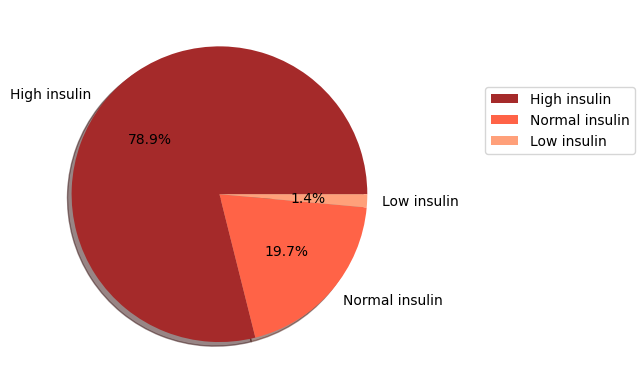

In [23]:
shades = ['brown','tomato','lightsalmon']
data={
    'High insulin' : high_insulin,
    'Normal insulin': normal_insulin,
    'Low insulin': low_insulin
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

In [24]:
dia_high_insulin=((df['Insulin'] >105) & (df['Outcome']==1)).sum()
not_dia_high_insulin=((df['Insulin'] >105) & (df['Outcome']==0)).sum()
print(dia_high_insulin, not_dia_high_insulin)

248 358


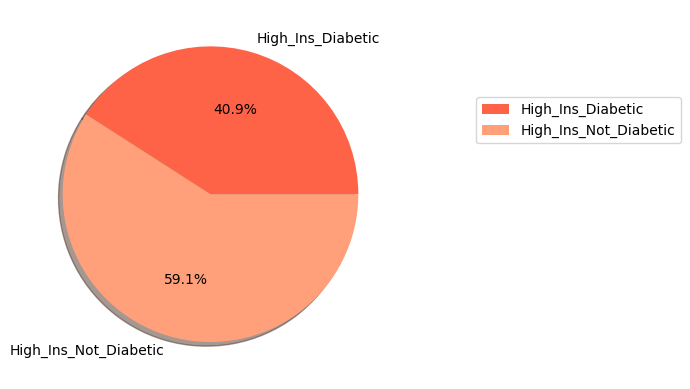

In [25]:
shades = ['tomato','lightsalmon']
data={
    'High_Ins_Diabetic' : dia_high_insulin,
    'High_Ins_Not_Diabetic': not_dia_high_insulin
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

In [26]:
#relation between age and Outcome



dia_Young_Adults = ((df['Age'] >= 20) & (df['Age'] <= 29)  & (df["Outcome"] == 1)).sum()
dia_Adults = ((df['Age'] >=30) & (df['Age'] <=49) & (df["Outcome"] == 1)).sum()
dia_Middle_aged = ((df['Age'] >=50) & (df['Age'] <=64) & (df["Outcome"] == 1)).sum()
dia_Seniors = ((df['Age'] >=65) & (df["Outcome"] == 1)).sum()
print(dia_Young_Adults , dia_Adults, dia_Middle_aged, dia_Seniors)

not_dia_Young_Adults = ((df['Age'] >= 20) & (df['Age'] <= 29)  & (df["Outcome"] == 0)).sum()
not_dia_Adults = ((df['Age'] >=30) & (df['Age'] <=49) & (df["Outcome"] == 0)).sum()
not_dia_Middle_aged = ((df['Age'] >=50) & (df['Age'] <=64) & (df["Outcome"] == 0)).sum()
not_dia_Seniors = ((df['Age'] >=65) & (df["Outcome"] == 0)).sum()
print(not_dia_Young_Adults , not_dia_Adults, not_dia_Middle_aged, not_dia_Seniors)

84 141 39 4
312 142 34 12


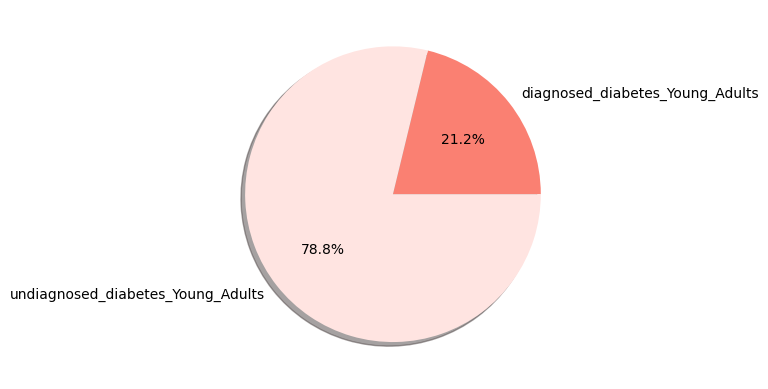

In [27]:
import matplotlib.pyplot as plt
shades=['salmon','mistyrose']
data ={
    'diagnosed_diabetes_Young_Adults' :dia_Young_Adults,
    'undiagnosed_diabetes_Young_Adults' :not_dia_Young_Adults
}
plt.pie(data.values(), labels=data.keys(),colors=shades,shadow=True, autopct='%2.1f%%')
plt.show()

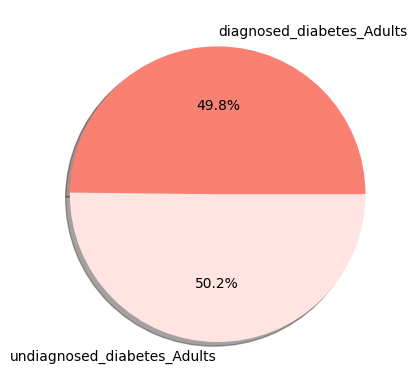

In [28]:
shades=['salmon','mistyrose']
data ={
    'diagnosed_diabetes_Adults' :dia_Adults,
    'undiagnosed_diabetes_Adults' :not_dia_Adults
}
plt.pie(data.values(), labels=data.keys(),colors=shades,shadow=True, autopct='%2.1f%%')
plt.show()

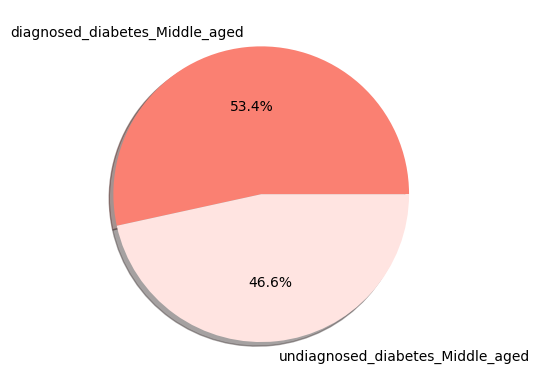

In [29]:
shades=['salmon','mistyrose']
data ={
    'diagnosed_diabetes_Middle_aged' :dia_Middle_aged,
    'undiagnosed_diabetes_Middle_aged' :not_dia_Middle_aged
}
plt.pie(data.values(), labels=data.keys(),colors=shades,shadow=True, autopct='%2.1f%%')
plt.show()

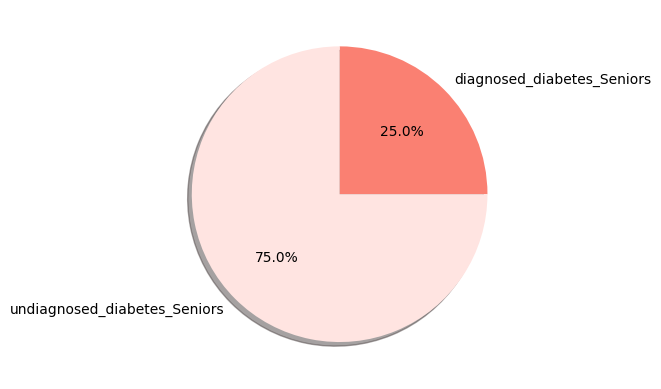

In [30]:
shades=['salmon','mistyrose']
data ={
    'diagnosed_diabetes_Seniors' :dia_Seniors,
    'undiagnosed_diabetes_Seniors' :not_dia_Seniors
}
plt.pie(data.values(), labels=data.keys(),colors=shades,shadow=True, autopct='%2.1f%%')
plt.show()

In [31]:
#relation between glucose and Outcome
low_glucose =df[df['Glucose'] < 70]
normal_glucose=df[(df['Glucose'] >= 70) & (df['Glucose'] <= 100)]
high_glucose=df[(df['Glucose'] >100)]


low_glucose_dia = (low_glucose['Outcome']==1).mean() * 100
low_glucose_not_dia = (low_glucose['Outcome']==0).mean() * 100

normal_glucose_dia = (normal_glucose['Outcome']==1).mean() * 100
normal_glucose_not_dia  = (normal_glucose['Outcome']==0).mean() * 100

high_glucose_dia =(high_glucose['Outcome']==1).mean() * 100
high_glucose_not_dia = (high_glucose['Outcome']==0).mean() * 100



print("Low Glucose: {:.2f}% Diabetic".format(low_glucose_dia))
print("Low Glucose: {:.2f}% Not Diabetic".format(low_glucose_not_dia))

print("Normal Glucose: {:.2f}% Diabetic".format(normal_glucose_dia))
print("Normal Glucose: {:.2f}% Not Diabetic".format(normal_glucose_not_dia))

print("High Glucose: {:.2f}% Diabetic".format(high_glucose_dia))
print("High Glucose: {:.2f}% Not Diabetic".format(high_glucose_not_dia))

Low Glucose: 0.00% Diabetic
Low Glucose: 100.00% Not Diabetic
Normal Glucose: 9.09% Diabetic
Normal Glucose: 90.91% Not Diabetic
High Glucose: 44.72% Diabetic
High Glucose: 55.28% Not Diabetic


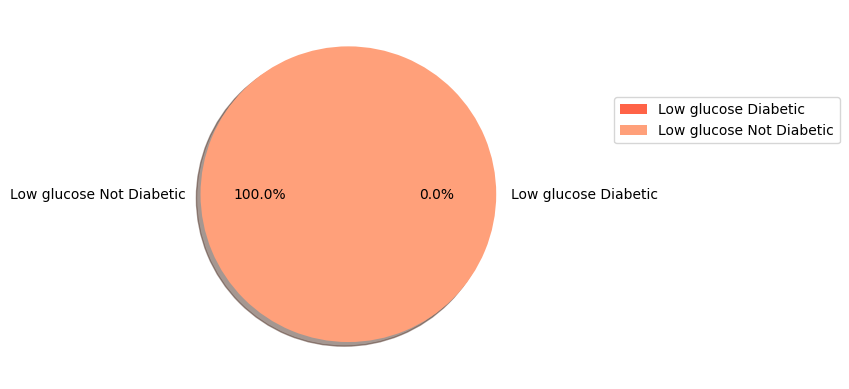

In [32]:
shades = ['tomato','lightsalmon']
data={
    'Low glucose Diabetic' : low_glucose_dia,
    'Low glucose Not Diabetic': low_glucose_not_dia,
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

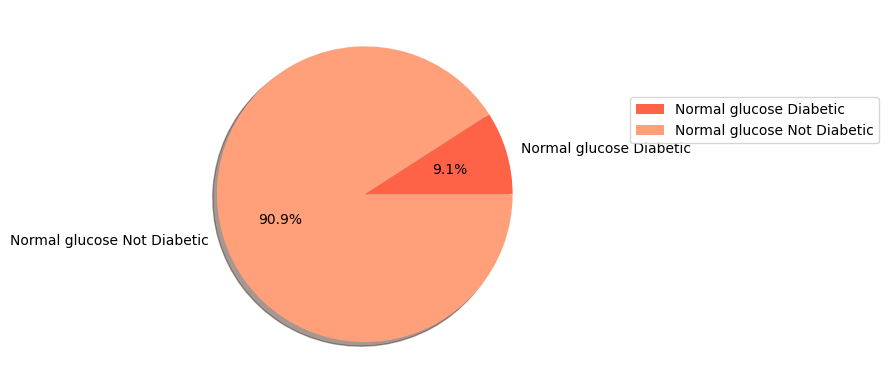

In [33]:
shades = ['tomato','lightsalmon']
data={
    'Normal glucose Diabetic' : normal_glucose_dia,
    'Normal glucose Not Diabetic': normal_glucose_not_dia,
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

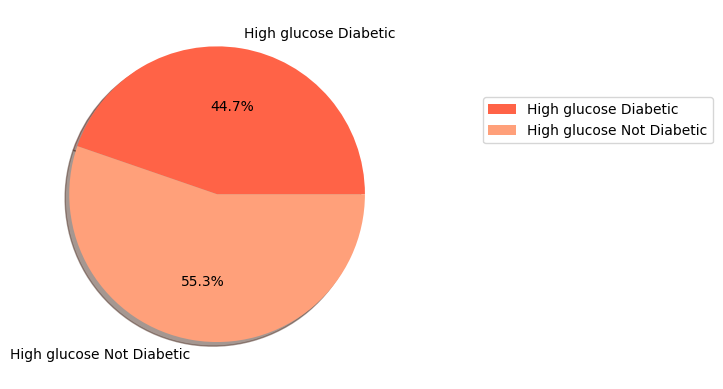

In [34]:
shades = ['tomato','lightsalmon']
data={
    'High glucose Diabetic' : high_glucose_dia,
    'High glucose Not Diabetic': high_glucose_not_dia,
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

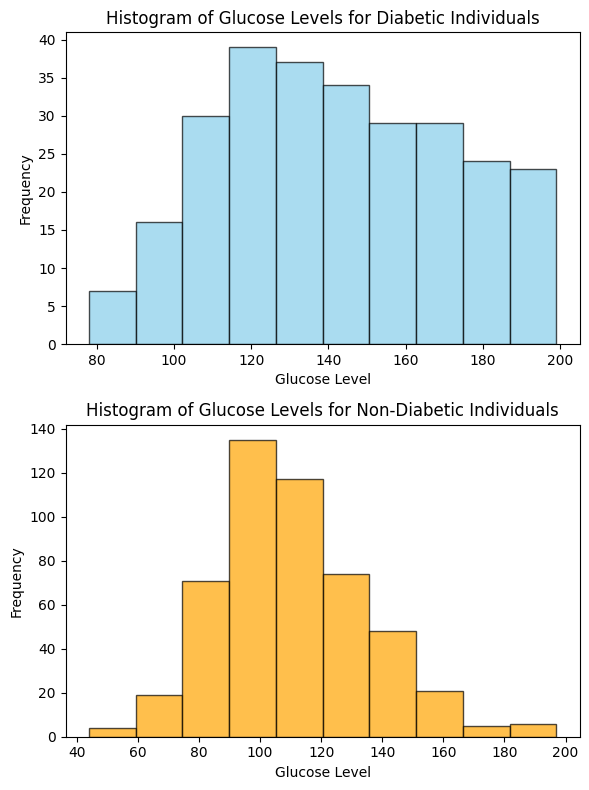

In [51]:
import seaborn as sns
diabetic_df = df[df['Outcome']==1]
non_diabetic_df = df[df['Outcome']==0]
fig, axes = plt.subplots(2, 1, figsize=(6, 8))

axes[0].hist(diabetic_df['Glucose'].values, bins=10, color='skyblue', edgecolor='black', density=False, alpha=0.7)
axes[0].set_title('Histogram of Glucose Levels for Diabetic Individuals')
axes[0].set_xlabel('Glucose Level')
axes[0].set_ylabel('Frequency')


axes[1].hist(non_diabetic_df['Glucose'].values, bins=10, color='orange', edgecolor='black', density=False, alpha=0.7)
axes[1].set_title('Histogram of Glucose Levels for Non-Diabetic Individuals')
axes[1].set_xlabel('Glucose Level')
axes[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [35]:
total_young_adults_preg = df[(df['Age'] >= 20) & (df['Age'] <= 29) & (df['Pregnancies'] >=1)]
total_adults_preg = df[(df['Age'] >= 30) & (df['Age'] <= 49) & (df['Pregnancies'] >= 1)]
total_middle_aged_preg = df[(df['Age'] >= 50) & (df['Age'] <= 64) & (df['Pregnancies'] >= 1)]
total_seniors_preg = df[(df['Age'] >= 65) & (df['Pregnancies'] >= 1)]

In [36]:
Young_Adults_preg_dia = (total_young_adults_preg['Outcome']==1).mean()*100
Young_Adults_preg_not_dia = (total_young_adults_preg['Outcome']==0).mean()*100

Adults_preg_dia = (total_adults_preg['Outcome'] == 1).mean() * 100
Adults_preg_not_dia = (total_adults_preg['Outcome'] == 0).mean() * 100

Middle_aged_preg_dia = (total_middle_aged_preg['Outcome'] == 1).mean() * 100
Middle_aged_preg_not_dia = (total_middle_aged_preg['Outcome'] == 0).mean() * 100

Seniors_preg_dia = (total_seniors_preg['Outcome'] == 1).mean() * 100
Seniors_preg_not_dia = (total_seniors_preg['Outcome'] == 0).mean() * 100

print("Young Adults (Pregnant): {:.2f}% Diabetic".format(Young_Adults_preg_dia))
print("Young Adults (Pregnant): {:.2f}% Not Diabetic".format(Young_Adults_preg_not_dia))

print("Adults (Pregnant): {:.2f}% Diabetic".format(Adults_preg_dia))
print("Adults (Pregnant): {:.2f}% Not Diabetic".format(Adults_preg_not_dia))

print("Middle Aged (Pregnant): {:.2f}% Diabetic".format(Middle_aged_preg_dia))
print("Middle Aged (Pregnant): {:.2f}% Not Diabetic".format(Middle_aged_preg_not_dia))

print("Seniors (Pregnant): {:.2f}% Diabetic".format(Seniors_preg_dia))
print("Seniors (Pregnant): {:.2f}% Not Diabetic".format(Seniors_preg_not_dia))

Young Adults (Pregnant): 18.77% Diabetic
Young Adults (Pregnant): 81.23% Not Diabetic
Adults (Pregnant): 49.43% Diabetic
Adults (Pregnant): 50.57% Not Diabetic
Middle Aged (Pregnant): 53.62% Diabetic
Middle Aged (Pregnant): 46.38% Not Diabetic
Seniors (Pregnant): 28.57% Diabetic
Seniors (Pregnant): 71.43% Not Diabetic


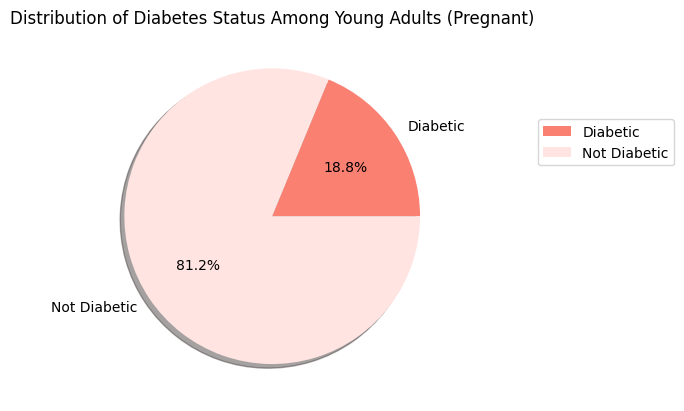

In [37]:
shades = ['salmon','mistyrose']
data={
    'Diabetic' : Young_Adults_preg_dia,
    'Not Diabetic': Young_Adults_preg_not_dia
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.title("Distribution of Diabetes Status Among Young Adults (Pregnant)")
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

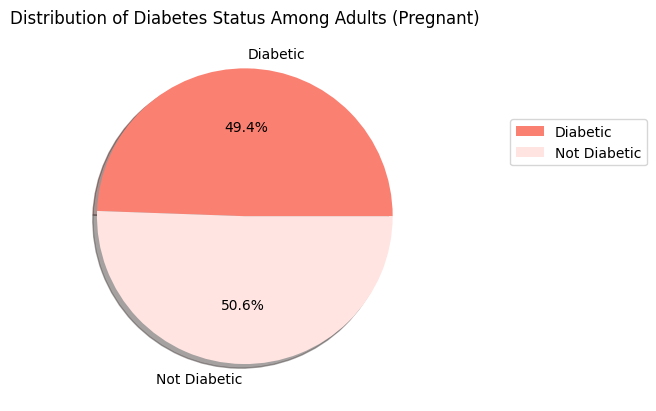

In [38]:
shades = ['salmon','mistyrose']
data={
    'Diabetic' : Adults_preg_dia,
    'Not Diabetic': Adults_preg_not_dia
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.title("Distribution of Diabetes Status Among Adults (Pregnant)")
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

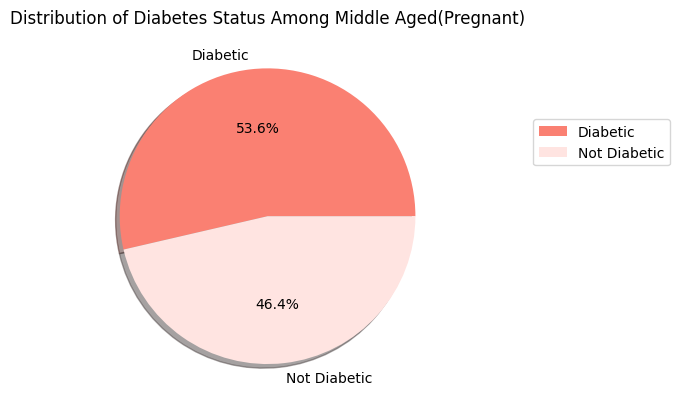

In [39]:
shades = ['salmon','mistyrose']
data={
    'Diabetic' : Middle_aged_preg_dia,
    'Not Diabetic':Middle_aged_preg_not_dia
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.title("Distribution of Diabetes Status Among Middle Aged(Pregnant)")
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

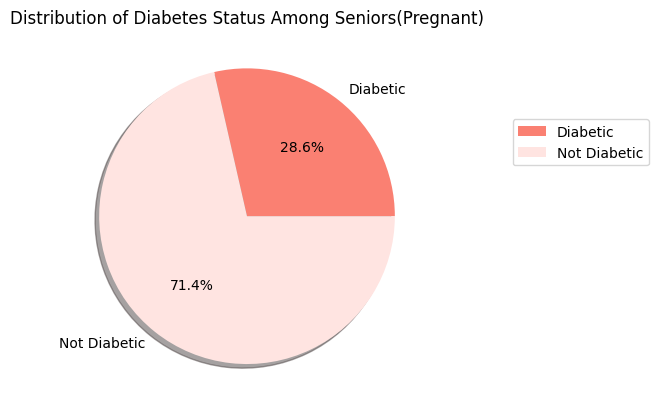

In [40]:
shades = ['salmon','mistyrose']
data={
    'Diabetic' : Seniors_preg_dia,
    'Not Diabetic':Seniors_preg_not_dia
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.title("Distribution of Diabetes Status Among Seniors(Pregnant)")
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

In [41]:
correlation_matrix = df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.208615,0.089028,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.130155,1.000000,0.219975,0.229289,0.419475,0.233820,0.138353,0.268910,0.495990
BloodPressure,0.208615,0.219975,1.000000,0.197094,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.089028,0.229289,0.197094,1.000000,0.154240,0.565018,0.106280,0.129537,0.295138
Insulin,0.025047,0.419475,0.045363,0.154240,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.233820,0.281257,0.565018,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.138353,-0.002378,0.106280,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.268910,0.324915,0.129537,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.495990,0.165723,0.295138,0.203790,0.312038,0.173844,0.238356,1.000000


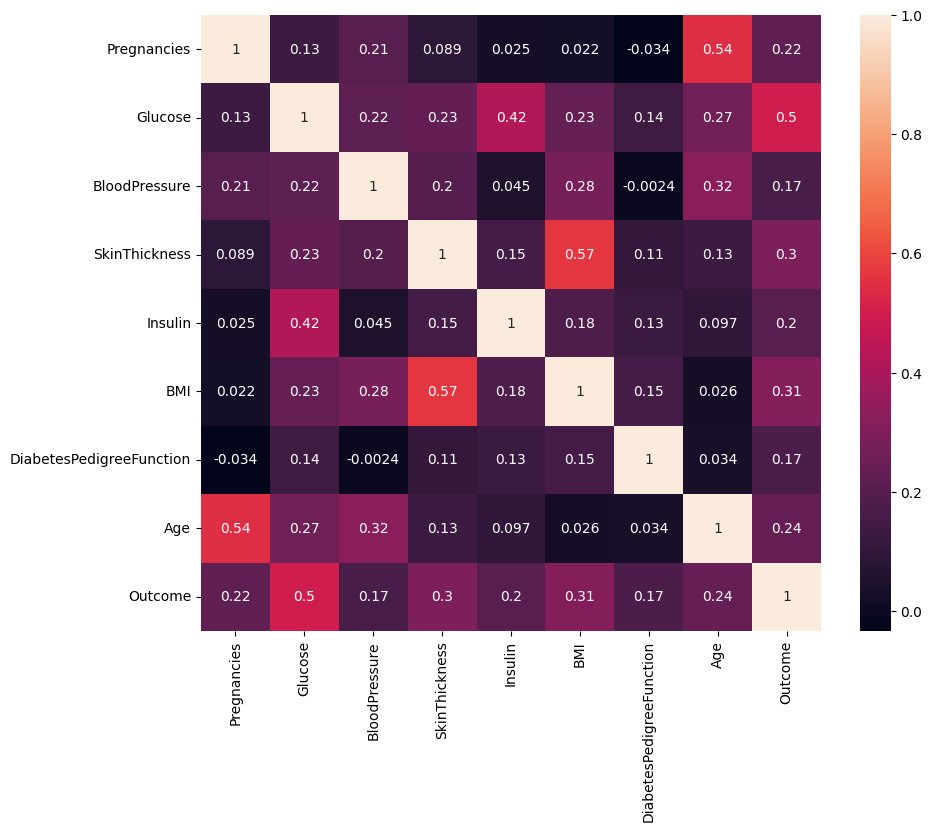

In [42]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [43]:
underweight = df[df['BMI'] < 18.5]
normal_weight = df[(df['BMI'] >= 18.5) & (df['BMI'] < 25)]
overweight = df[(df['BMI'] >= 25) & (df['BMI'] < 30)]
obese = df[df['BMI'] >= 30]


In [44]:
underweight_dia = (underweight["Outcome"]==1).mean() * 100
underweight_not_dia= (underweight["Outcome"]==0).mean() * 100

normal_weight_dia = (normal_weight["Outcome"]==1).mean() * 100
normal_weight_not_dia  = (normal_weight["Outcome"]==0).mean() * 100

overweight_dia = (overweight["Outcome"]==1).mean() * 100
overweight_not_dia = (overweight["Outcome"]==0).mean() * 100

obese_dia = (obese["Outcome"]==1).mean() * 100
obese_not_dia = (obese["Outcome"]==0).mean() * 100


print("underweight: {:.2f}% Diabetic".format(underweight_dia))
print("underweight: {:.2f}% Not Diabetic".format(underweight_not_dia))

print("normal_weight: {:.2f}% Diabetic".format(normal_weight_dia))
print("normal_weight: {:.2f}% Not Diabetic".format(normal_weight_not_dia))

print("overweight: {:.2f}% Diabetic".format(overweight_dia))
print("overweight: {:.2f}% Not Diabetic".format(overweight_not_dia))

print("obese: {:.2f}% Diabetic".format(obese_dia))
print("obese: {:.2f}% Not Diabetic".format(obese_not_dia))

underweight: 0.00% Diabetic
underweight: 100.00% Not Diabetic
normal_weight: 6.86% Diabetic
normal_weight: 93.14% Not Diabetic
overweight: 22.35% Diabetic
overweight: 77.65% Not Diabetic
obese: 45.76% Diabetic
obese: 54.24% Not Diabetic


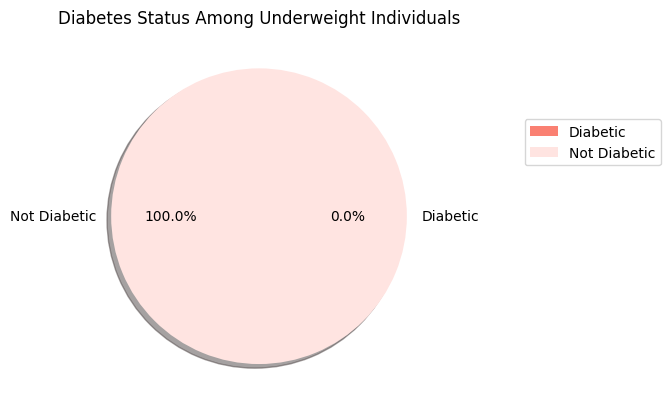

In [45]:
shades = ['salmon','mistyrose']
data={
    'Diabetic' : underweight_dia,
    'Not Diabetic':underweight_not_dia
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.title("Diabetes Status Among Underweight Individuals")
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

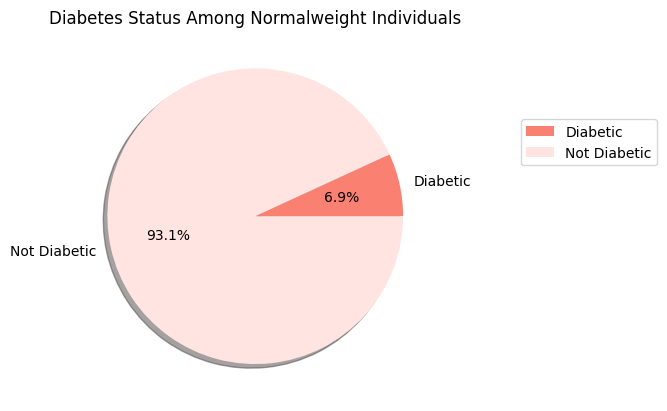

In [46]:
shades = ['salmon','mistyrose']
data={
    'Diabetic' : normal_weight_dia,
    'Not Diabetic':normal_weight_not_dia
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.title("Diabetes Status Among Normalweight Individuals")
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

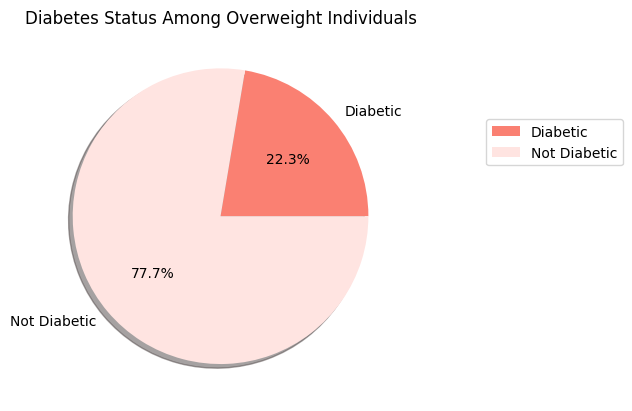

In [47]:
shades = ['salmon','mistyrose']
data={
    'Diabetic' : overweight_dia,
    'Not Diabetic':overweight_not_dia
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.1f%%')
plt.title("Diabetes Status Among Overweight Individuals")
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

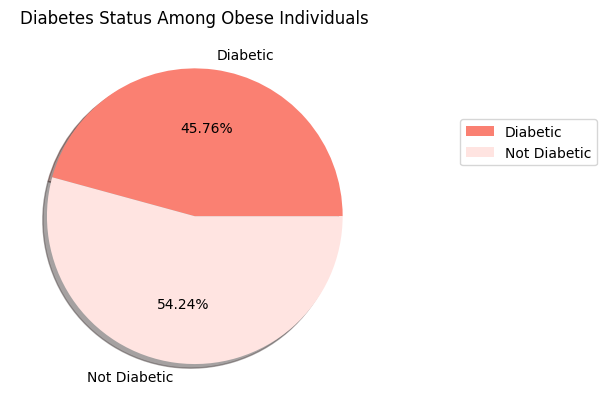

In [48]:
shades = ['salmon','mistyrose']
data={
    'Diabetic' : obese_dia,
    'Not Diabetic':obese_not_dia
}

plt.pie(data.values(), labels=data.keys(), shadow=True, colors=shades, autopct='%2.2f%%')
plt.title("Diabetes Status Among Obese Individuals")
plt.legend(loc ='center left', bbox_to_anchor=(1.2,0.7))
plt.show()

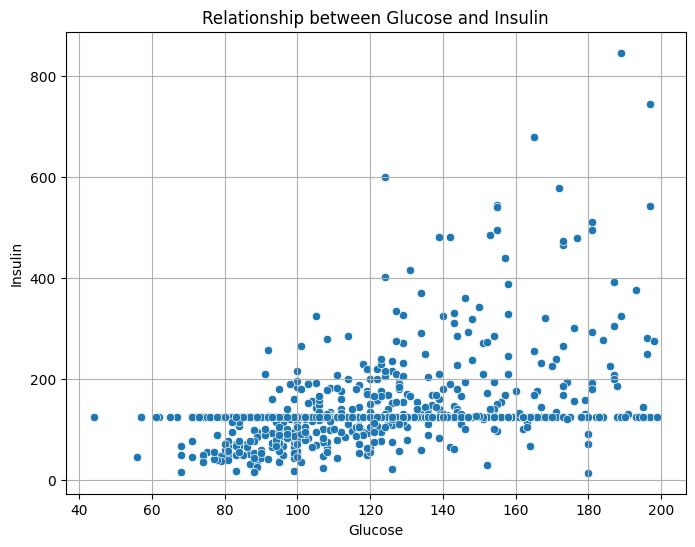

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Glucose', y='Insulin')
plt.title('Relationship between Glucose and Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.grid(True)
plt.show()

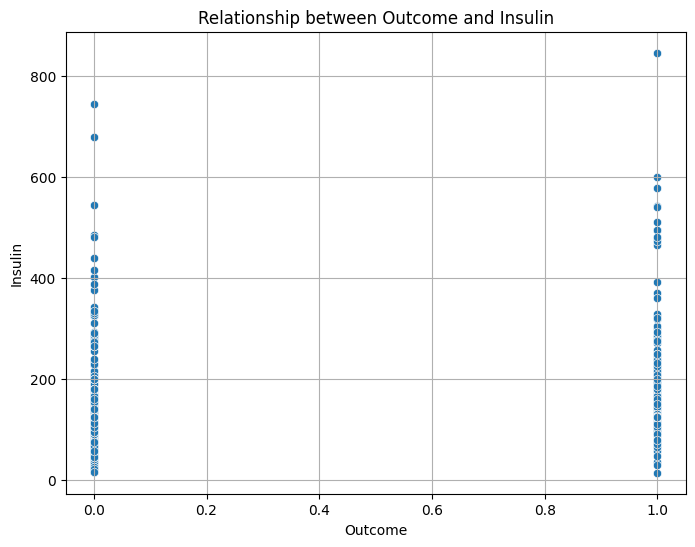

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Outcome', y='Insulin')
plt.title('Relationship between Outcome and Insulin')
plt.xlabel('Outcome')
plt.ylabel('Insulin')
plt.grid(True)
plt.show()